## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Data

In [10]:
ST = pd.read_csv('Shark Tank India Dataset.csv')
ST.head(3)

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.0,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.0,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.0,...,0,1,0,0,1,0,0,2,12.5,15.000000


### Checking data's shape, null values and info

In [3]:
ST.shape

(117, 28)

In [7]:
ST.isna().sum().sum()

0

In [5]:
ST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   episode_number         117 non-null    int64  
 1   pitch_number           117 non-null    int64  
 2   brand_name             117 non-null    object 
 3   idea                   117 non-null    object 
 4   deal                   117 non-null    int64  
 5   pitcher_ask_amount     117 non-null    float64
 6   ask_equity             117 non-null    float64
 7   ask_valuation          117 non-null    float64
 8   deal_amount            117 non-null    float64
 9   deal_equity            117 non-null    float64
 10  deal_valuation         117 non-null    float64
 11  ashneer_present        117 non-null    int64  
 12  anupam_present         117 non-null    int64  
 13  aman_present           117 non-null    int64  
 14  namita_present         117 non-null    int64  
 15  vineet

As we can see data is pretty simple with no nun values.

### Additional Info about data

1,0 repesents about deal's sucess of failure respectively, similiar for every columns containing 1,0 values.

Every column containg amount is in lakhs, eg- 1000 is 1000 lakh or 10 cr

As we have general idea about values in data and data is clear with 0 nun values we can start visualisation and analysation.

### Visualization and Analyzation of Data

In [11]:
ashneer=list(ST.ashneer_present)
anupam=list(ST.anupam_present)
aman=list(ST.aman_present)
namita=list(ST.namita_present)
vineeta=list(ST.vineeta_present)
peyush=list(ST.peyush_present)
ghazal=list(ST.ghazal_present)


xx=pd.DataFrame({'Sharks':['ASHNEER','ANUPAM','AMAN','NAMITA','VINEETA','PEYUSH','GHAZAL'],
              'Number_of_appearance':[sum(ashneer),sum(anupam),sum(aman),sum(namita),sum(vineeta),sum(peyush),sum(ghazal)]})

In [12]:
xx

,Sharks,Number_of_appearance
0,ASHNEER,98
1,ANUPAM,117
2,AMAN,98
3,NAMITA,106
4,VINEETA,66
5,PEYUSH,88
6,GHAZAL,26


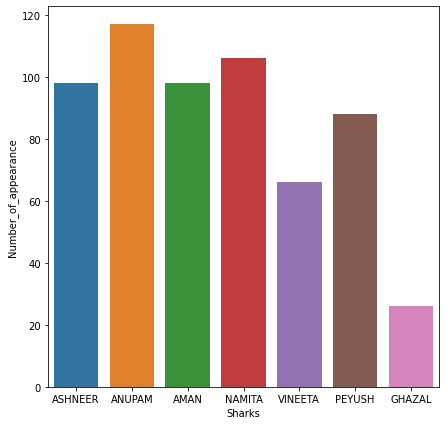

In [7]:
plt.figure(figsize=(7,7))
sns.barplot(x=xx.Sharks,y=xx.Number_of_appearance,data=xx);

This graph shows number of appearance by sharks.

Anupam got most appearance and Ghazal got least.

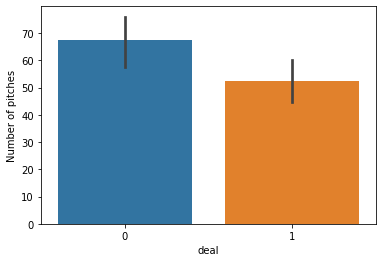

In [8]:
sns.barplot(x='deal',y='pitch_number',data=ST).set(ylabel='Number of pitches');

This bar graph shows that there are more number of deals rejected by sharks.

#### Since main visualization and analyzation can be done only for sucessful deals, so we are making new dataset only with sucessfull deals

In [9]:
st=ST[ST['deal']==1]

In [10]:
st.head()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,1,0,0,0,0,0,0,1,70.0,2.750000
7,3,8,Peeschute,Disposable Urine Bag,1,75.0,4.0,1875.00,75.0,6.00,...,0,0,1,0,0,0,0,1,75.0,6.000000


Text(0.5, 1.0, 'Difference b/w asked amount and amount recived')

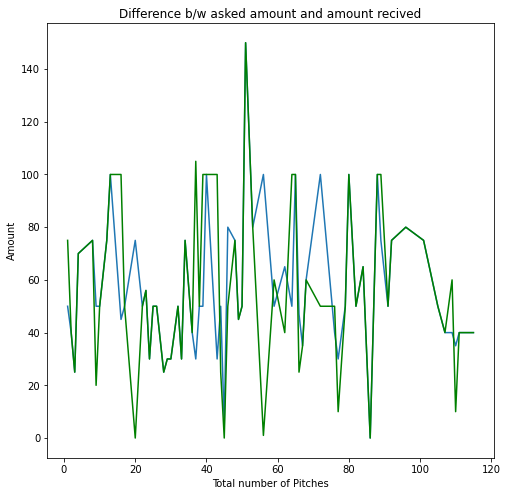

In [11]:
plt.figure(figsize=(8,8))
plt.plot(st.pitch_number,st.pitcher_ask_amount)
plt.plot(st.pitch_number,st.deal_amount,'-g')
plt.xlabel('Total number of Pitches')
plt.ylabel('Amount')
plt.title('Difference b/w asked amount and amount recived')

This graph shows that some entrepreneurs got more money than asked value and some got lesser and rest got there asked amount.

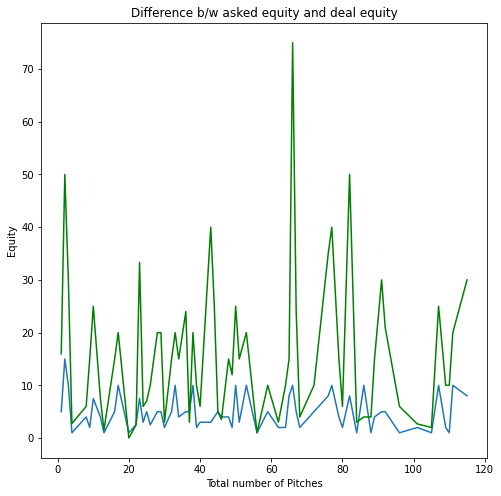

In [12]:
plt.figure(figsize=(8,8))
plt.plot(st.pitch_number,st.ask_equity)
plt.plot(st.pitch_number,st.deal_equity,'-g')
plt.xlabel('Total number of Pitches')
plt.ylabel('Equity')
plt.title('Difference b/w asked equity and deal equity');

This graph shows Sharks got more equity than equity offered by entrepreneurs.

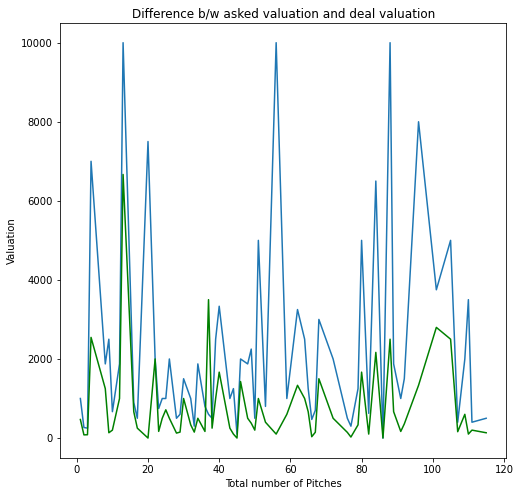

In [13]:
plt.figure(figsize=(8,8))
plt.plot(st.pitch_number,st.ask_valuation)
plt.plot(st.pitch_number,st.deal_valuation,'-g')
plt.xlabel('Total number of Pitches')
plt.ylabel('Valuation')
plt.title('Difference b/w asked valuation and deal valuation');

This graph shows that valuation of entrepreneur's comapnines is high for sharks.

Thats the reason that sharks got more equity than offered equity because higher valuation and lesser equity.

In [14]:
a=ST[ST['ashneer_deal']==1]
aa=list(a.amount_per_shark)
t=0
for i in aa:
    t+=i

b=ST[ST['anupam_deal']==1]
ba=list(b.amount_per_shark)
u=0
for i in ba:
    u+=i

c=ST[ST['aman_deal']==1]
ca=list(c.amount_per_shark)
v=0
for i in ca:
    v+=i

d=ST[ST['namita_deal']==1]
da=list(d.amount_per_shark)
w=0
for i in da:
    w+=i
    
e=ST[ST['vineeta_deal']==1]
ea=list(e.amount_per_shark)
x=0
for i in ea:
    x+=i
    
f=ST[ST['peyush_deal']==1]
fa=list(f.amount_per_shark)
y=0
for i in fa:
    y+=i
    
g=ST[ST['ghazal_deal']==1]
ga=list(g.amount_per_shark)
z=0
for i in ga:
    z+=i

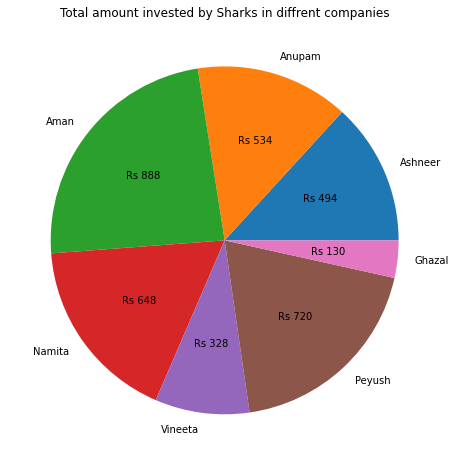

In [15]:
plt.figure(figsize=(8,8))
pie=[t,u,v,w,x,y,z]
total=sum(pie)
l=['Ashneer','Anupam','Aman','Namita','Vineeta','Peyush','Ghazal']
plt.pie(pie,labels=l,autopct=lambda p: 'Rs {:.0f}'.format(p * total / 100))
plt.title('Total amount invested by Sharks in diffrent companies');

This pie chart shows amount invested by Sharks in number of companies.

Higest investment is done by Aman and lowest by Ghazal.

In [16]:
h=ST[ST['ashneer_deal']==1]
he=list(h.equity_per_shark)
a=0
for i in he:
    a+=i

i=ST[ST['anupam_deal']==1]
ie=list(i.equity_per_shark)
b=0
for y in ie:
    b+=y
    
j=ST[ST['aman_deal']==1]
je=list(j.equity_per_shark)
c=0
for i in je:
    c+=i
    
k=ST[ST['namita_deal']==1]
ke=list(k.equity_per_shark)
d=0
for i in ke:
    d+=i
    
l=ST[ST['vineeta_deal']==1]
le=list(l.equity_per_shark)
e=0
for i in le:
    e+=i
    
m=ST[ST['peyush_deal']==1]
me=list(m.equity_per_shark)
f=0
for i in me:
    f+=i
    
n=ST[ST['ghazal_deal']==1]
ne=list(n.equity_per_shark)
g=0
for i in ne:
    g+=i

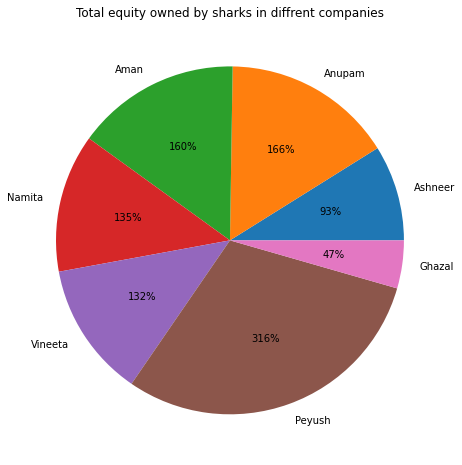

In [17]:
plt.figure(figsize=(8,8))
pie=[a,b,c,d,e,f,g]
total=sum(pie)
l=['Ashneer','Anupam','Aman','Namita','Vineeta','Peyush','Ghazal']
plt.pie(pie,labels=l,autopct=lambda p: '{:.0f}%'.format(p * total / 100))
plt.title('Total equity owned by sharks in diffrent companies');

This pie chart shows total percentage of equity owned by sharks in number of companies.

Highest percentage of equity owned by Peyush and lowest by Ghazal.

As we can see that Ghazal invested least amount of money and have least percentage of equity but on other hand Aman invested highest but Peyush got highest percentage of equity.

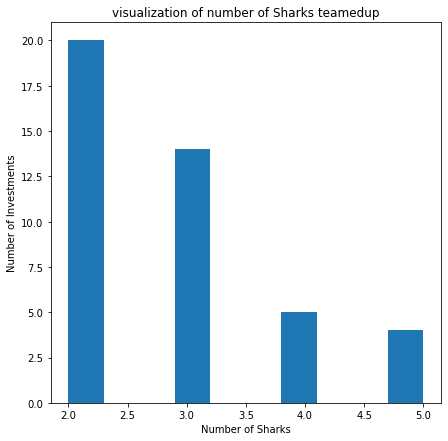

In [18]:
sT=ST[ST['total_sharks_invested']>1]
plt.figure(figsize=(7,7))
plt.hist(sT.total_sharks_invested)
plt.title('visualization of number of Sharks teamedup')
plt.xlabel('Number of Sharks')
plt.ylabel('Number of Investments');

This graph shows that sharks are interested in teaming up on ideas they like and there are considerable times sharks teamed up.

In [19]:
l=sT[sT['total_sharks_invested']>3]
l.groupby(['brand_name','idea'])['total_sharks_invested'].max()

brand_name             idea                          
Find Your Kicks India  Sneaker Resale                    5
IN A CAN               Can Cocktails                     5
Jain Shikanji          Lemonade                          4
Nomad Food Project     Bacon Jams                        4
Skippi Pops            Ice-Pops                          5
Sunfox Technologies    Portable ECG Device               5
The Yarn Bazaar        Yarn-Trading App                  4
Watt Technovations     Ventilated PPE Kits               4
WeSTOCK                Livestock health monitoring AI    4
Name: total_sharks_invested, dtype: int64

There are most popular ideas and brands that attraced most number of sharks.

In [20]:
ashneer=list(ST.ashneer_deal)
anupam=list(ST.anupam_deal)
aman=list(ST.aman_deal)
namita=list(ST.namita_deal)
vineeta=list(ST.vineeta_deal)
peyush=list(ST.peyush_deal)
ghazal=list(ST.ghazal_deal)

In [21]:
x=pd.DataFrame({'Sharks':['ASHNEER','ANUPAM','AMAN','NAMITA','VINEETA','PEYUSH','GHAZAL'],
              'Number_of_Deals':[sum(ashneer),sum(anupam),sum(aman),sum(namita),sum(vineeta),sum(peyush),sum(ghazal)]})

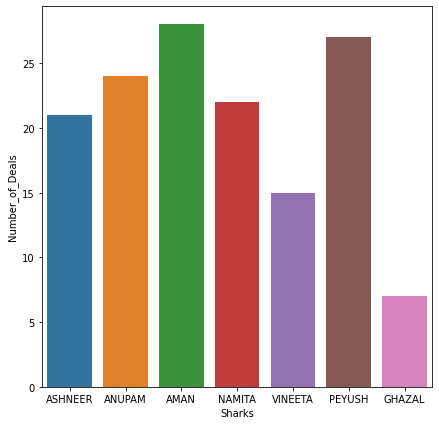

In [22]:
plt.figure(figsize=(7,7))
sns.barplot(x=x.Sharks,y=x.Number_of_Deals,data=x);

This Graph shows number of deals by sharks.

Aman got highest number of 28 deals  and Ghazal got lowest 7 deals.

In [23]:
Ashneer=[]
for i in ashneer:
    if i ==1:
        Ashneer.append('Ashneer ')
    else:
        Ashneer.append('')
Anupam=[]
for i in anupam:
    if i ==1:
        Anupam.append('Anupam ')
    else:
        Anupam.append('')
Aman=[]
for i in aman:
    if i ==1:
        Aman.append('Aman ')
    else:
        Aman.append('')
Namita=[]
for i in namita:
    if i ==1:
        Namita.append('Namita ')
    else:
        Namita.append('')
Vineeta=[]
for i in vineeta:
    if i ==1:
        Vineeta.append('Vineeta ')
    else:
        Vineeta.append('')
Peyush=[]
for i in peyush:
    if i ==1:
        Peyush.append('Peyush ')
    else:
        Peyush.append('')
Ghazal=[]
for i in ghazal:
    if i ==1:
        Ghazal.append('Ghazal ')
    else:
        Ghazal.append('')

In [24]:
sharks = []
for (i1,i2,i3,i4,i5,i6,i7) in zip(Ashneer,Anupam,Aman,Namita,Vineeta,Peyush,Ghazal):
    sharks.append(i1+i2+i3+i4+i5+i6+i7)
z=[]
x=[]
for i in sharks:
    if len(i)>8:
        z.append(f"{i},{sharks.count(i)}")
for j in z:
    if j not in x:
        x.append(j)
x

['Ashneer Aman Vineeta ,2',
 'Ashneer Vineeta ,1',
 'Anupam Vineeta ,3',
 'Aman Namita ,5',
 'Anupam Aman ,2',
 'Ashneer Anupam Aman Namita Vineeta ,1',
 'Ashneer Aman ,2',
 'Anupam Peyush ,2',
 'Aman Peyush ,1',
 'Aman Namita Peyush ,1',
 'Anupam Aman Peyush ,2',
 'Ashneer Aman Peyush ,1',
 'Anupam Namita Peyush ,1',
 'Ashneer Anupam Aman Peyush ,1',
 'Anupam Aman Namita ,1',
 'Ashneer Anupam ,1',
 'Ashneer Anupam Aman Namita Peyush ,2',
 'Ashneer Namita Peyush ,1',
 'Ashneer Aman Namita Peyush ,1',
 'Ashneer Anupam Peyush ,2',
 'Anupam Ghazal ,1',
 'Anupam Namita Vineeta Peyush Ghazal ,1',
 'Anupam Namita Peyush Ghazal ,1',
 'Vineeta Peyush Ghazal ,2',
 'Namita Vineeta Ghazal ,1',
 'Namita Vineeta ,1',
 'Ashneer Peyush ,1',
 'Ashneer Namita Vineeta Ghazal ,1',
 'Ashneer Anupam Aman Vineeta ,1']

This list shows number of time sharks teamed up with same shark.

Aman and Namita teamed up for most of time, 5 times

and than Anupam and Vineta 3 times 

## This Analyzation and Visualization shows different results but one thing is clear that non of columns corelate with one another and result of every analyzation based upon interest of sharks in ideas or entrepreneur.

#### But one this is certain that Ghazal appeared in leaset number of episodes and got least percentage of equity and least investment